In [1]:
## Import libraries
import numpy as np
import pandas as pd
import itertools


# Import visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters import gaussian
#import visualkeras


from sklearn.metrics import confusion_matrix

# import tensorflow
import tensorflow as tf

# import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D, Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.constraints import maxnorm

from keras.preprocessing.image import ImageDataGenerator

# import CIFAR 10 dataset
from keras.datasets import cifar10

In [2]:
# Loading data & splitting to train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# Normalize the numbers
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# One hot encode outputs as we have 10 classes
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [5]:
# Image augmentation to be able create noise
train_datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect', cval=125)

train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)

In [6]:
# Instentiate CNN model
model = Sequential()


model.add(Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, kernel_constraint = maxnorm(3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, kernel_constraint = maxnorm(3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Output 
model.add(Dense(class_num, activation = 'softmax'))

In [7]:
%%time

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=(X_test, y_test), epochs=200, batch_size = 100, steps_per_epoch = 1000)

Epoch 1/200
1000/1000 [==============================] - 34s 22ms/step - loss: 1.9786 - accuracy: 0.2965 - val_loss: 1.6373 - val_accuracy: 0.3973
Epoch 2/200
1000/1000 [==============================] - 20s 20ms/step - loss: 1.6845 - accuracy: 0.3882 - val_loss: 1.5663 - val_accuracy: 0.4569
Epoch 3/200
1000/1000 [==============================] - 20s 20ms/step - loss: 1.5773 - accuracy: 0.4264 - val_loss: 1.2992 - val_accuracy: 0.5178
Epoch 4/200
1000/1000 [==============================] - 20s 20ms/step - loss: 1.4935 - accuracy: 0.4600 - val_loss: 1.1501 - val_accuracy: 0.5740
Epoch 5/200
1000/1000 [==============================] - 20s 20ms/step - loss: 1.4380 - accuracy: 0.4805 - val_loss: 1.1484 - val_accuracy: 0.5888
Epoch 6/200
1000/1000 [==============================] - 20s 20ms/step - loss: 1.3940 - accuracy: 0.5013 - val_loss: 1.0890 - val_accuracy: 0.6124
Epoch 7/200
1000/1000 [==============================] - 20s 20ms/step - loss: 1.3519 - accuracy: 0.5182 - val_loss: 0

In [8]:
%%time
predictions = np.argmax(model.predict(X_test),axis=1)

CPU times: user 1.4 s, sys: 113 ms, total: 1.51 s
Wall time: 2.22 s


REAL LIFE PHOTOS

In [13]:
# Define Classes
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
# Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving Bird2.jpg to Bird2.jpg


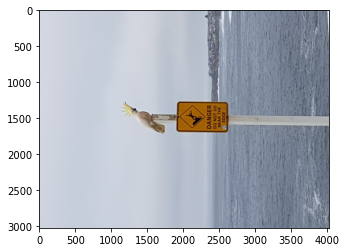

In [11]:
# Show the image
bird_image = plt.imread('Bird2.jpg')
bird_img = plt.imshow(bird_image)

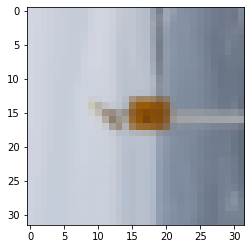

In [12]:
# Resize the image
from skimage.transform import resize
resized_bird = resize(bird_image, (32,32,3))
bird_img = plt.imshow(resized_bird)

In [14]:
%%time
# Get the models predictions 
bird_predictions = model.predict(np.array([resized_bird]))
# Show the predictions
bird_predictions

CPU times: user 289 ms, sys: 5.86 ms, total: 295 ms
Wall time: 336 ms


In [16]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = bird_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[2, 0, 8, 4, 3, 5, 6, 7, 9, 1]


In [17]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(bird_predictions[0][list_index[i]] * 100, 2), '%')

bird : 66.24 %
airplane : 27.87 %
ship : 2.25 %
deer : 1.68 %
cat : 1.42 %
CPU times: user 4.55 ms, sys: 7 µs, total: 4.55 ms
Wall time: 7.32 ms


In [18]:
uploaded = files.upload()

Saving Horse1.jpg to Horse1.jpg


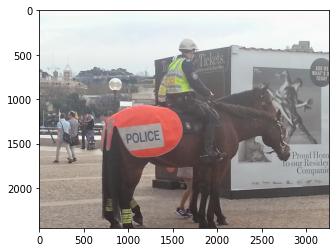

In [19]:
# Show the image
horse_image = plt.imread('Horse1.jpg')
horse_img = plt.imshow(horse_image)

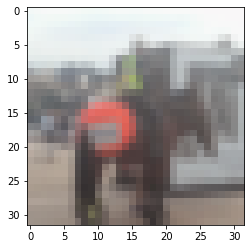

In [20]:
# Resize the image
resized_horse = resize(horse_image, (32,32,3))
horse_img = plt.imshow(resized_horse)

In [21]:
%%time
# Get the models predictions 
horse_predictions = model.predict(np.array([resized_horse]))
# Show the predictions
horse_predictions

CPU times: user 65.6 ms, sys: 2.97 ms, total: 68.6 ms
Wall time: 90.8 ms


In [22]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = horse_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[9, 7, 0, 2, 1, 4, 5, 8, 3, 6]


In [23]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(horse_predictions[0][list_index[i]] * 100, 2), '%')

truck : 39.23 %
horse : 37.93 %
airplane : 19.61 %
bird : 1.13 %
automobile : 0.89 %
CPU times: user 3.75 ms, sys: 0 ns, total: 3.75 ms
Wall time: 8.76 ms


In [24]:
uploaded = files.upload()

Saving Truck1.jpg to Truck1.jpg


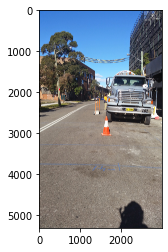

In [25]:
# Show the image
truck_image = plt.imread('Truck1.jpg')
truck_img = plt.imshow(truck_image)

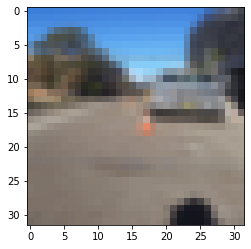

In [26]:
# Resize the image
resized_truck = resize(truck_image, (32,32,3))
truck_img = plt.imshow(resized_truck)

In [27]:
%%time
# Get the models predictions 
truck_predictions = model.predict(np.array([resized_truck]))
# Show the predictions
truck_predictions

CPU times: user 60.4 ms, sys: 3.03 ms, total: 63.4 ms
Wall time: 94.9 ms


In [28]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = truck_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[0, 9, 2, 3, 7, 1, 8, 5, 4, 6]


In [29]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(truck_predictions[0][list_index[i]] * 100, 2), '%')

airplane : 51.22 %
truck : 15.95 %
bird : 14.61 %
cat : 4.94 %
horse : 4.77 %
CPU times: user 3.56 ms, sys: 0 ns, total: 3.56 ms
Wall time: 4.78 ms


In [30]:
uploaded = files.upload()

Saving Ship2.jpg to Ship2.jpg


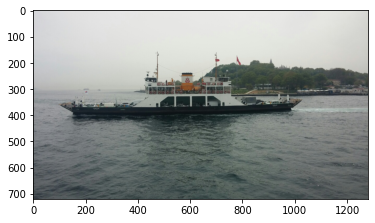

In [31]:
# Show the image
ship_image = plt.imread('Ship2.jpg')
ship_img = plt.imshow(ship_image)

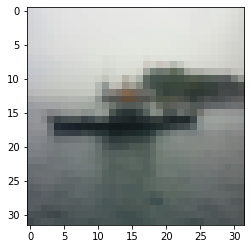

In [32]:
# Resize the image
resized_ship = resize(ship_image, (32,32,3))
ship_img = plt.imshow(resized_ship)

In [33]:
%%time
# Get the models predictions 
ship_predictions = model.predict(np.array([resized_ship]))
# Show the predictions
ship_predictions

CPU times: user 59.2 ms, sys: 5.06 ms, total: 64.3 ms
Wall time: 67.9 ms


In [34]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = ship_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[8, 0, 2, 9, 1, 4, 6, 3, 5, 7]


In [35]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(ship_predictions[0][list_index[i]] * 100, 2), '%')

ship : 94.58 %
airplane : 5.14 %
bird : 0.15 %
truck : 0.07 %
automobile : 0.03 %
CPU times: user 3.19 ms, sys: 990 µs, total: 4.18 ms
Wall time: 6.74 ms


In [36]:
uploaded = files.upload()

Saving Frog1.jpg to Frog1.jpg


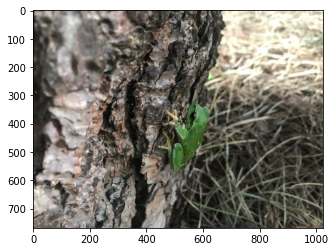

In [37]:
# Show the image
frog_image = plt.imread('Frog1.jpg')
frog_img = plt.imshow(frog_image)

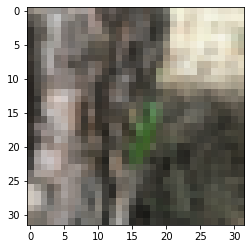

In [38]:
# Resize the image
resized_frog = resize(frog_image, (32,32,3))
frog_img = plt.imshow(resized_frog)

In [39]:
%%time
# Get the models predictions 
frog_predictions = model.predict(np.array([resized_frog]))
# Show the predictions
frog_predictions

CPU times: user 64.4 ms, sys: 2.01 ms, total: 66.4 ms
Wall time: 69.4 ms


In [40]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = frog_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[6, 3, 4, 2, 5, 7, 9, 0, 8, 1]


In [41]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(frog_predictions[0][list_index[i]] * 100, 2), '%')

frog : 85.24 %
cat : 9.1 %
deer : 4.23 %
bird : 1.02 %
dog : 0.35 %
CPU times: user 4.21 ms, sys: 0 ns, total: 4.21 ms
Wall time: 10.5 ms


In [42]:
uploaded = files.upload()

Saving Chacha2.jpeg to Chacha2.jpeg


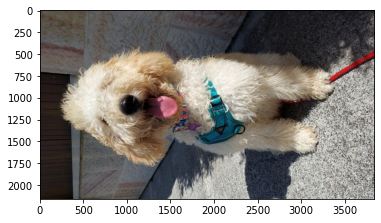

In [75]:
# Show the image
chacha_image = plt.imread('Chacha2.jpeg')
chacha_img = plt.imshow(chacha_image)

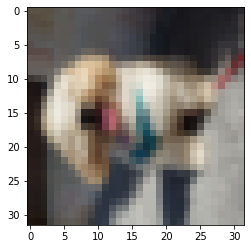

In [76]:
# Resize the image
resized_chacha = resize(chacha_image, (32,32,3))
chacha_img = plt.imshow(resized_chacha)

In [77]:
%%time
# Get the models predictions 
chacha_predictions = model.predict(np.array([resized_chacha]))
# Show the predictions
chacha_predictions

CPU times: user 233 ms, sys: 6.07 ms, total: 239 ms
Wall time: 235 ms


In [78]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = chacha_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[5, 3, 2, 7, 4, 6, 9, 0, 8, 1]


In [79]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(chacha_predictions[0][list_index[i]] * 100, 2), '%')

dog : 97.71 %
cat : 1.24 %
bird : 0.8 %
horse : 0.12 %
deer : 0.08 %
CPU times: user 3.08 ms, sys: 0 ns, total: 3.08 ms
Wall time: 2.86 ms


In [49]:
uploaded = files.upload()

Saving Budha3.jpeg to Budha3.jpeg


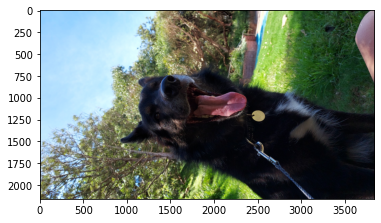

In [51]:
# Show the image
budha_image = plt.imread('Budha3.jpeg')
budha_img = plt.imshow(budha_image)

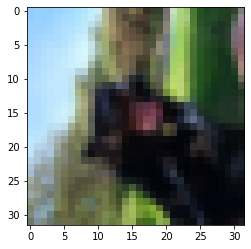

In [52]:
# Resize the image
resized_budha = resize(budha_image, (32,32,3))
budha_img = plt.imshow(resized_budha)

In [53]:
%%time
# Get the models predictions 
budha_predictions = model.predict(np.array([resized_budha]))
# Show the predictions
budha_predictions

CPU times: user 64 ms, sys: 1.93 ms, total: 65.9 ms
Wall time: 82.9 ms


In [54]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = budha_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[2, 6, 3, 5, 4, 9, 7, 0, 8, 1]


In [55]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(budha_predictions[0][list_index[i]] * 100, 2), '%')

bird : 27.36 %
frog : 21.83 %
cat : 18.12 %
dog : 17.29 %
deer : 4.78 %
CPU times: user 3.02 ms, sys: 33 µs, total: 3.05 ms
Wall time: 14.9 ms


In [56]:
uploaded = files.upload()

Saving Romeo1.jpg to Romeo1.jpg


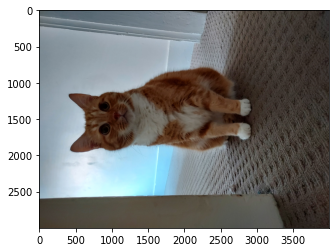

In [57]:
# Show the image
romeo_image = plt.imread('Romeo1.jpg')
romeo_img = plt.imshow(romeo_image)

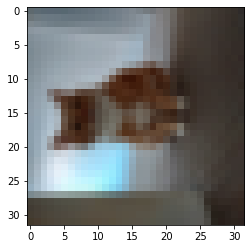

In [58]:
# Resize the image
resized_romeo = resize(romeo_image, (32,32,3))
romeo_img = plt.imshow(resized_romeo)

In [59]:
%%time
# Get the models predictions 
romeo_predictions = model.predict(np.array([resized_romeo]))
# Show the predictions
romeo_predictions

CPU times: user 62.9 ms, sys: 3 ms, total: 65.9 ms
Wall time: 70.7 ms


In [60]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = romeo_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[3, 5, 2, 4, 7, 0, 6, 9, 8, 1]


In [61]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(romeo_predictions[0][list_index[i]] * 100, 2), '%')

cat : 48.84 %
dog : 35.97 %
bird : 12.91 %
deer : 0.73 %
horse : 0.66 %
CPU times: user 3.22 ms, sys: 0 ns, total: 3.22 ms
Wall time: 3.67 ms


In [62]:
uploaded = files.upload()

Saving Truck3.jpg to Truck3.jpg


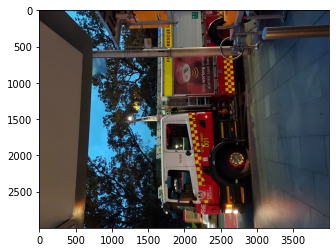

In [63]:
# Show the image
truck3_image = plt.imread('Truck3.jpg')
truck_img = plt.imshow(truck3_image)

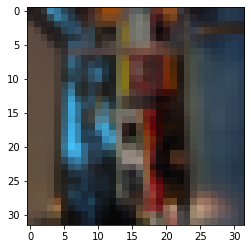

In [64]:
# Resize the image
resized_truck3 = resize(truck3_image, (32,32,3))
truck3_img = plt.imshow(resized_truck3)

In [65]:
%%time
# Get the models predictions 
truck3_predictions = model.predict(np.array([resized_truck3]))
# Show the predictions
truck3_predictions

CPU times: user 62.7 ms, sys: 0 ns, total: 62.7 ms
Wall time: 69.3 ms


In [66]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = truck3_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[5, 2, 3, 9, 7, 8, 6, 0, 1, 4]


In [67]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(truck3_predictions[0][list_index[i]] * 100, 2), '%')

dog : 31.98 %
bird : 19.65 %
cat : 19.04 %
truck : 12.17 %
horse : 5.77 %
CPU times: user 4.12 ms, sys: 0 ns, total: 4.12 ms
Wall time: 10.2 ms


In [68]:
uploaded = files.upload()

Saving Budha1.jpg to Budha1.jpg


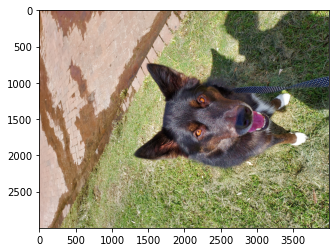

In [69]:
# Show the image
budha1_image = plt.imread('Budha1.jpg')
budha1_img = plt.imshow(budha1_image)

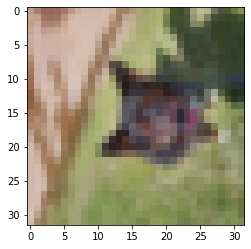

In [70]:
# Resize the image
resized_budha1 = resize(budha1_image, (32,32,3))
budha1_img = plt.imshow(resized_budha1)

In [71]:
%%time
# Get the models predictions 
budha1_predictions = model.predict(np.array([resized_budha1]))
# Show the predictions
budha1_predictions

CPU times: user 45.6 ms, sys: 2 ms, total: 47.6 ms
Wall time: 48 ms


In [72]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = budha1_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[4, 7, 2, 6, 5, 3, 0, 9, 8, 1]


In [73]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(budha1_predictions[0][list_index[i]] * 100, 2), '%')

deer : 53.85 %
horse : 27.73 %
bird : 6.73 %
frog : 3.96 %
dog : 3.84 %
CPU times: user 4.87 ms, sys: 975 µs, total: 5.85 ms
Wall time: 6.28 ms
